Read the train.csv, validation.csv and test.csv files from the Google Drive folder in which it was saved in `prepare.ipynb` notebook.

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/AML/Assignment 1'

In [5]:
df_train = pd.read_csv(file_path + "/train.csv")
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,37321,37322,37323,37324,37325,37326,37327,37328,37329,spam
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.054163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [17]:
df_val = pd.read_csv(file_path + '/validation.csv')

In [18]:
df_test = pd.read_csv(file_path + '/test.csv')

### **STEP 1**: Fit a model on train data


Firstly, we split the training dataset into `train_X` containing features and `train_y` containing the target.

In [11]:
train_X = df_train[df_train.columns[:-1]]
train_y = df_train['spam'].copy()

Next, We fit the training data on a logistic regression model

In [13]:
from sklearn.linear_model import LogisticRegression

log_reg_model = LogisticRegression(random_state = 0)
log_reg_model.fit(train_X, train_y)

LogisticRegression(random_state=0)

### **STEP  2**: Score a model on given data


In [43]:
print('Training score:', format(log_reg_model.score(train_X, train_y), '.3f'))

Training score: 0.996


### **STEP  3**: Evaluate the model predictions.


Next, we find the accuracy and f1 score of the model on the training dataset.

In [46]:
from sklearn.metrics import accuracy_score, f1_score

y_pred = log_reg_model.predict(train_X)
print('accuracy:', round(accuracy_score(train_y, y_pred),3))
print('f1 score:', round(f1_score(train_y, y_pred),3))

accuracy: 0.996
f1 score: 0.99


Next, we obtain a confusion matrix for the training dataset.

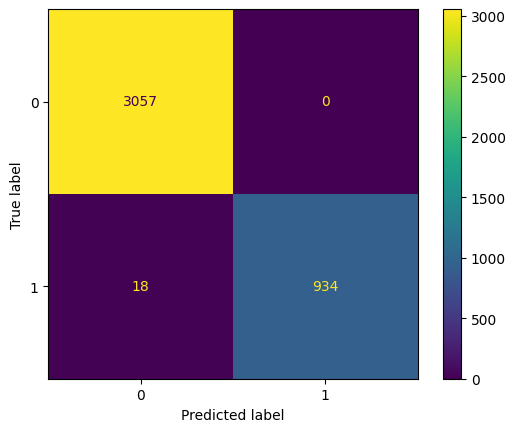

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_predictions(train_y, y_pred)

We can also obtain the training classification report

In [34]:
from sklearn.metrics import classification_report
print('Training classification report\n', classification_report(train_y, y_pred))

Training classification report
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3057
           1       1.00      0.98      0.99       952

    accuracy                           1.00      4009
   macro avg       1.00      0.99      0.99      4009
weighted avg       1.00      1.00      1.00      4009



Observation: The Logistic Regression model is able to detect spam emails with 99.55% accuracy on the training data.

### **STEP 4**: Validate the model

#### (i) Score on train and validation

We have already fit the Logistic Regression model on training data.

Now let us validate the model using the validation dataset

For this, we must first split the validation dataset into `val_X` containing features and `val_y` containing the target.

In [35]:
val_X = df_val[df_val.columns[:-1]]
val_y = df_val['spam'].copy()

Now, let us score the model on the validation dataset.

In [47]:
print("Validation score:", round(log_reg_model.score(val_X, val_y),3))

Validation score: 0.98


#### (ii) Evaluate on train and validation


Next, we find the accuracy and f1 score of the model on the validation dataset.

In [50]:
y_val_pred = log_reg_model.predict(val_X)

print('On the validation dataset:')
print('  accuracy:', round(accuracy_score(val_y, y_val_pred),3))
print('  f1 score:', round(f1_score(val_y, y_val_pred),3))

On the validation dataset:
  accuracy: 0.98
  f1 score: 0.957


Next, we obtain a confusion matrix for the training dataset.

Confusion Matrix using Validation data


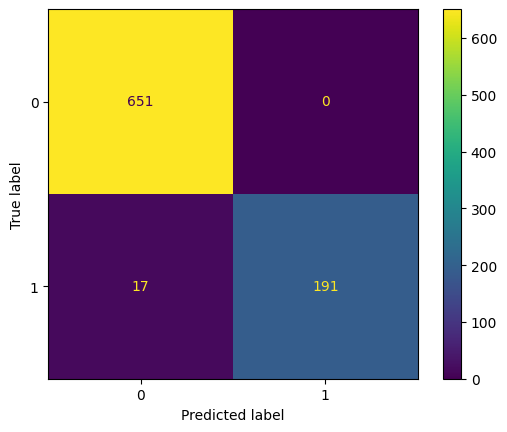

In [54]:
print('Confusion Matrix using Validation data')
cm_display = ConfusionMatrixDisplay.from_predictions(val_y, y_val_pred)

We can also obtain the validation classification report

In [53]:
print('Validation classification report\n', classification_report(val_y, y_val_pred))

Validation classification report
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       651
           1       1.00      0.92      0.96       208

    accuracy                           0.98       859
   macro avg       0.99      0.96      0.97       859
weighted avg       0.98      0.98      0.98       859



The Logistic Regression model is able to detect spam emails with 98% accuracy on the validation data.

#### (iv) Fine-tune using train and validation (if necessary)

The above model we have used takes the value of parameter C as 1 (default).

Even though this model is providing 98% accuracy, let us try to do hyperparameter tuning to see if we can improve the performance even further.

In [59]:
from sklearn.model_selection import GridSearchCV

param_grid ={'C': [1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0]}
log_reg_cv = GridSearchCV(log_reg_model, param_grid = param_grid, cv = 5, scoring = 'f1')
log_reg_cv.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]},
             scoring='f1')

In [60]:
log_reg_cv.best_params_

{'C': 100.0}

Hence, the best parameter value of C is 100.

Now, let's find score the best logistic regression (C = 100) on the validation dataset.

In [74]:
best_log_reg_model = log_reg_cv.best_estimator_
best_log_reg_model.fit(train_X, train_y)

print("Validation score using best logistic regression model:", round(best_log_reg_model.score(val_X, val_y),3))

Validation score using best logistic regression model: 0.998


Let us find the accuracy and f1 score of this model on the validation dataset.

In [75]:
y_val_pred = best_log_reg_model.predict(val_X)

print('Using the best logistic regression model on the validation dataset')
print('  accuracy:', round(accuracy_score(val_y, y_val_pred),3))
print('  f1 score:', round(f1_score(val_y, y_val_pred),3))

Using the best logistic regression model on the validation dataset
  accuracy: 0.998
  f1 score: 0.995


We can observe that there is a significant improvement in the predictions on validation dataset by taking the value of the parameter C of the Logistic Regression classifier as 100.

### **STEP 5**: Score 3 benchmark models on test data and select the best one

#### 1. **Logistic Regression Classifier**

Firstly, we split the testing dataset into `test_X` containing features and `test_y` containing the target.

In [20]:
test_X = df_test[df_test.columns[:-1]]
test_y = df_test['spam'].copy()

Now, let us score the testing data on the benchmark Logistic Regression classifier we had defined earlier.

In [95]:
print('Testing score using Logistic Regression classifier:', round(log_reg_model.score(test_X, test_y),3))

Testing score using Logistic Regression classifier: 0.97


In [98]:
y_test_pred_log_reg = log_reg_model.predict(test_X)

log_reg_accuracy = round(accuracy_score(test_y, y_test_pred_log_reg),3)
log_reg_f1 = round(f1_score(test_y, y_test_pred_log_reg),3)

print('On the testing data, using Logistic Regression classifier')
print('  accuracy score:', log_reg_accuracy)
print('  F1 score:', log_reg_f1)

On the testing data, using Logistic Regression classifier
  accuracy score: 0.97
  F1 score: 0.934


Let us also check the classification report with Logistic Regression classifier.

In [97]:
print("Classification report with Logistic Regression classifier")
print(classification_report(test_y, y_test_pred_log_reg))

Classification report with Logistic Regression classifier
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       652
           1       0.99      0.88      0.93       208

    accuracy                           0.97       860
   macro avg       0.98      0.94      0.96       860
weighted avg       0.97      0.97      0.97       860



#### 2. **Naive Bayes Classifier**

In [81]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(train_X, train_y)

print('Testing score using MultinomialNB:', round(mnb.score(test_X, test_y),3))

Testing score using MultinomialNB: 0.858


In [99]:
y_test_pred_mnb = mnb.predict(test_X)

mnb_accuracy = round(accuracy_score(test_y, y_test_pred_mnb),3)
mnb_f1 = round(f1_score(test_y, y_test_pred_mnb),3)

print('On the testing data, using MultinomialNB')
print('  accuracy score:', mnb_accuracy)
print('  F1 score:', mnb_f1)

On the testing data, using MultinomialNB
  accuracy score: 0.858
  F1 score: 0.591


Let us also check the classification report with Multinomial Naive Bayes classifier.

In [84]:
print("Classification report with MultinomialNB classifier")
print(classification_report(test_y, y_test_pred_mnb))

Classification report with MultinomialNB classifier
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       652
           1       0.98      0.42      0.59       208

    accuracy                           0.86       860
   macro avg       0.91      0.71      0.75       860
weighted avg       0.88      0.86      0.84       860



#### 3. **Random Forest Classifier**

In [89]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 0)
rfc.fit(train_X, train_y)

print('Testing score using Random Forest Classifier:', round(rfc.score(test_X, test_y),3))

Testing score using Random Forest Classifier: 0.958


In [107]:
y_test_pred_rfc = rfc.predict(test_X)

rfc_accuracy = round(accuracy_score(test_y, y_test_pred_rfc),3)
rfc_f1 = round(f1_score(test_y, y_test_pred_rfc),3)

print('On the testing data, using Random Forest Classifier')
print('  accuracy score:', rfc_accuracy)
print('  F1 score:', rfc_f1)

On the testing data, using Random Forest Classifier
  accuracy score: 0.958
  F1 score: 0.905


Let us also check the classification report with Random Forest classifier.

In [92]:
print("Classification report with Random Forest classifier")
print(classification_report(test_y, y_test_pred_rfc))

Classification report with Random Forest classifier
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       652
           1       1.00      0.83      0.91       208

    accuracy                           0.96       860
   macro avg       0.97      0.91      0.94       860
weighted avg       0.96      0.96      0.96       860



### **Observation**

Let's summarize the above observations and tabulate the accuracy and F1 scores obtained.

In [116]:
print('\t\tLogistic Reg\tMultinomial NB\tRandom Forest')
print('Accuracy\t{0}\t\t{1}\t\t{2}'.format(log_reg_accuracy, mnb_accuracy, rfc_accuracy))
print('F1 score\t{0}\t\t{1}\t\t{2}'.format(log_reg_f1, mnb_f1, rfc_f1))

		Logistic Reg	Multinomial NB	Random Forest
Accuracy	0.97		0.858		0.958
F1 score	0.934		0.591		0.905


We observe that the accuracy and F1 scores are highest for a Logistic Regression classifer, followed next by a Random Forest Classifier.